### 라이브러리 임포트

In [14]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

### CSV 파일 불러오기

In [4]:
file_path = r"C:\Users\MinGi\Desktop\year3-sem1\인공지능개론\dataset\diabetes.csv"
df = pd.read_csv(file_path)

print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### 레이블 개수 및 결측치 확인

In [7]:
print(df['Outcome'].value_counts(), "\n")
print(df.isnull().sum())

Outcome
0    500
1    268
Name: count, dtype: int64 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### 입력/정답 나누기

In [9]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

### 전처리

In [22]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

### 원-핫 인코딩

In [13]:
Y = pd.get_dummies(y).values

### 훈련/테스트 나누기

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, Y,test_size=0.25,random_state=0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(576, 8) (576, 2)
(192, 8) (192, 2)


### 모델 정의 

In [15]:
model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(learning_rate=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\MinGi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃                 ┃ Output      ┃  Param ┃
┃ Layer (type)    ┃ Shape       ┃      # ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ dense (Dense)   │ (None, 10)  │     90 │
├─────────────────┼─────────────┼────────┤
│ dense_1 (Dense) │ (None, 8)   │     88 │
├─────────────────┼─────────────┼────────┤
│ dense_2 (Dense) │ (None, 6)   │     54 │
├─────────────────┼─────────────┼────────┤
│ dense_3 (Dense) │ (None, 2)   │     14 │
└─────────────────┴─────────────┴────────┘

 Total params: 246 (984.00 B)

 Trainable params: 246 (984.00 B)

 Non-trainable params: 0 (0.00 B)

### 모델 학습 및 예측

In [23]:
model_history=model.fit(x=x_train, y=y_train, epochs=8, batch_size=32,validation_split=0.1) # train의 10%를 validation으로 설정. 검증에 사용
y_pred = model.predict(x_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8476 - loss: 0.3217 - val_accuracy: 0.7414 - val_loss: 1.1687
Epoch 2/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8077 - loss: 0.3721 - val_accuracy: 0.7414 - val_loss: 1.1109
Epoch 3/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8630 - loss: 0.3045 - val_accuracy: 0.7241 - val_loss: 1.0497
Epoch 4/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8145 - loss: 0.3636 - val_accuracy: 0.7759 - val_loss: 1.1619
Epoch 5/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8478 - loss: 0.3558 - val_accuracy: 0.7414 - val_loss: 0.9340
Epoch 6/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8524 - loss: 0.3342 - val_accuracy: 0.7586 - val_loss: 1.0942
Epoch 7/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8423 - loss: 0.3353 - val_accuracy: 0.7414 - val_loss: 1.0041
Epoch 8/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8648 - loss: 0.3043 - val_accuracy: 0.7759 - val_loss:

### 손실 시각화

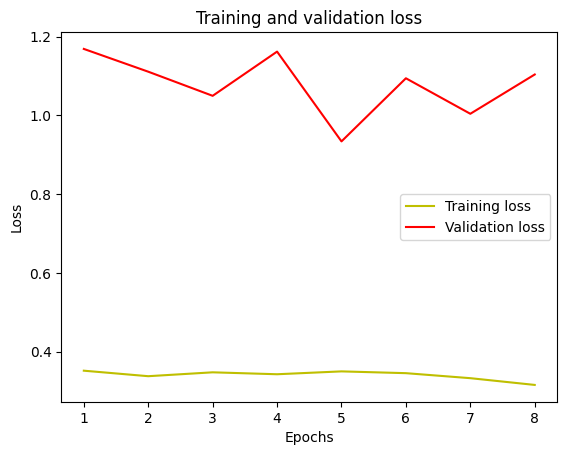

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 정확도 시각화

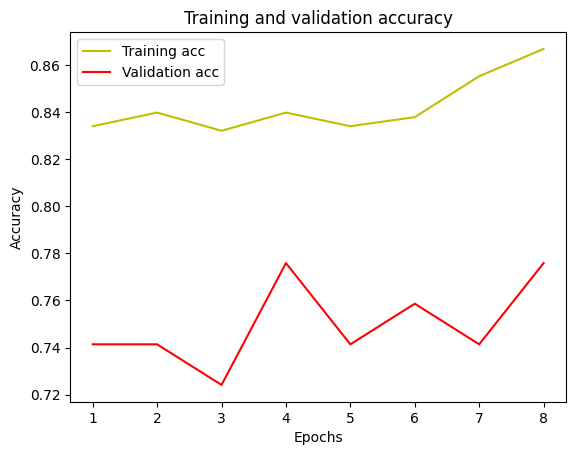

In [25]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 정확도 확인

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       130
           1       0.63      0.65      0.64        62

    accuracy                           0.77       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.77      0.77      0.77       192

[[107  23]
 [ 22  40]]
